In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Es_Centro(y):
  x=np.arange(0,int (len(y)/2))
  for i in range (int (len(y)/2)):
    x[i]=i*2
  return x

In [3]:
def Es_Centro_3D(m):
  x = np.zeros((int(len(m)), 2))
  for i in range(int(len(m))):
     x[i][0] = i % int(len(m)/12) * 12/(int(len(m)/12)-1)
     x[i][1] = i//int(len(m)/12)
  return x

In [4]:
def Fit(x,c,e):
  #y = np.sqrt(1+np.fabs((((x-c))**2)/(2*(e**2))))
  y =np.exp(-((np.fabs(x-c))**2)/(2*(e**2)))
  return y

In [5]:
def Fit_3D(x,y,c1,c2,e1,e2):
  #y = np.sqrt((1+((e1*np.fabs(x-c1))**2)))+np.sqrt((1+((e2*np.fabs(y-c2))**2)))
  y=np.exp(-(((x-c1))**2)/(2*((e1)**2)))+np.exp(-(((y-c2))**2)/(2*((e2)**2)))
  return y

In [6]:
def Pr_Matriz(c,mes):
  e=np.std(c)
  M=np.full((len(mes),len(c)),0.6)
  for j in range(len(c)):
    for i in range(len(mes)):
      M[i][j]=Fit(i,c[j],e)

  return M

In [7]:
def Pr_Matriz_3D(c,mes):
  M=np.zeros(((len(mes),len(c))))
  e=3.415650255319866
  k=0
  for j in range(int(len(c))):
    for i in range(len(mes)):
      M[i][j]=Fit_3D(i,k,c[j][0],c[j][1],e,e)
      if i%3==0:
        k+=1
        if k>3:
          k=0
  return M

In [8]:
def O_Plot_de_Graft(t,w,c):
  y=0
  e=np.std(c)
  for i in range(len(w)):
    #y+=w[i]*np.sqrt(1+np.fabs(((t-c[i])**2)/(2*((e)**2))))
    y+=w[i]*np.exp(-((np.fabs(t-c[i]))**2)/(2*((e)**2)))
  return y


In [9]:
def O_Plot_de_Graft_3D(t,m,w,c):
  y=0
  e=3.415650255319866
  for i in range(len(w)):
    #y+=w[i]*np.sqrt((1+((np.fabs(t-c[i][0]))**2)/(2*((e)**2))))+w[i]*np.sqrt((1+((np.fabs(m-c[i][1]))**2)/(2*((e)**2))))
    y+=w[i]*np.exp(-((np.fabs(t-c[i][0]))**2)/(2*((e)**2)))+w[i]*np.exp(-((np.fabs(m-c[i][1]))**2)/(2*((e)**2)))

  return y

In [10]:
janeiro = np.array([32,188,329,450,522,588,617,610,577,515,416,279,69])
fevereiro = np.array([17,162,303,437,568,615,640,635,589,521,414,281,73])
março = np.array([22,171,321,447,559,614,632,634,600,526,428,283,48])
abril = np.array([36,215,340,395,485,540,560,550,515,450,364,230,11])
maio = np.array([49,259,376,433,490,540,555,546,520,465,370,215,9])
junho = np.array([27,207,325,385,419,469,482,468,448,409,340,196,8])
julho = np.array([10,180,303,371,411,456,473,474,468,421,346,216,10])
agosto = np.array([26,214,349,419,497,570,606,602,575,511,417,252,12])
setembro = np.array([35,182,334,462,548,613,635,635,594,526,410,217,8])
outubro = np.array([67,245,406,572,657,682,693,686,644,561,431,228,8])
novembro = np.array([87,269,436,579,659,703,703,690,638,552,443,251,10])
dezembro = np.array([52,215,363,486,569,642,664,650,608,523,407,247,26])

Ano = np.array([5192,	5255,	5285,	4691,	4827,	4183,	4139,	5050,	5199,	5880,	6020,	5452])
Ano2=np.array([32,588,279,17,615,281,22,614,283,36,540,230,49,540,215,27,469,196,10,456,196,26,570,252,35,635,217,67,682,228,87,703,251,52,642,247])

Meses=np.array([janeiro, fevereiro, março, abril, maio, junho, julho, agosto, setembro, outubro, novembro , dezembro])
Nome=np.array(["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro" , "Dezembro","Ano"])

In [11]:
def teste(cm,h):
  A=np.array([])
  for i in range(12):
    for j in range(int(h/cm)+h%2):
      A = np.append(A, Meses[i][j * cm])
  return A


In [12]:
def Aproximacao_Solar_Atlas(Mes,i):
  T= np.linspace(0,len(Mes),1000)
  Centro=np.array([])
  Centro=Es_Centro(Mes)
  A=Pr_Matriz(Centro,Mes)
  #print(A)

  W=(np.linalg.inv(np.transpose(A)@A))@np.transpose(A)@Mes
  print(W)

  y=O_Plot_de_Graft(T,W,Centro)

  fig, ax = plt.subplots()
  ax.plot(T,y,'r')
  if Nome[i]== 'Ano':
    ax.set(xlabel='Meses', ylabel='kWh/m²',title=Nome[i])
  else:
    ax.set(xlabel='Horas', ylabel='kWh/m²',title=Nome[i])
  plt.plot(Mes,'o')
  ax.grid()

In [13]:
def Aproximacao_Solar_Atlas_3D(Mes,i):
  M= np.linspace(0,13,100)
  T= np.linspace(0,13,100)
  Centro=np.array([],[])
  Centro=Es_Centro_3D(Mes)


  A=Pr_Matriz_3D(Centro,Mes)
  W=(np.linalg.inv(np.transpose(A)@A))@np.transpose(A)@Mes/20

  X, Y=np.meshgrid(M,T)
  Z=O_Plot_de_Graft_3D(X,Y,W,Centro)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X, Y, Z, cmap='jet')
  ax.set_xlabel('Meses')
  ax.set_ylabel('Horas')
  ax.set_zlabel('kWh/m²')
  fig.colorbar(surf)

  plt.show()

[  359.87400081 -2553.67293564  5818.06042094 -6601.37662898
  5204.44048241 -1733.98085813]
[ 1147.76619247 -4601.25473725  8313.13640509 -8389.86517286
  6002.75952313 -1914.96326816]
[ 1193.32448036 -4926.78440321  9176.24477576 -9593.51352845
  6947.50611196 -2259.1938682 ]
[ -167.97557804 -1069.83845459  3862.84328819 -5109.33228851
  4497.40774085 -1620.91485796]
[ -841.45581649   535.71161446  2141.66611036 -4069.5644625
  4171.97700179 -1593.18949685]
[ -450.51868795  -507.72695079  3451.75463689 -5106.19704869
  4559.49589315 -1649.29495078]
[ -298.14493571 -1005.74970802  4208.51222425 -5870.73339848
  5053.49138011 -1796.29719862]
[ -207.40838897 -1183.76886057  4375.97724838 -5954.15048622
  5289.95613945 -1916.91240776]
[  907.95946789 -4198.94399781  8375.93453771 -9203.43172287
  7011.22872545 -2408.06447935]
[  1033.34968167  -4875.91391954   9884.21392071 -10835.40151158
   8091.61735263  -2749.48370505]
[  1036.52604379  -4787.13123057   9686.54806347 -10560.59923421


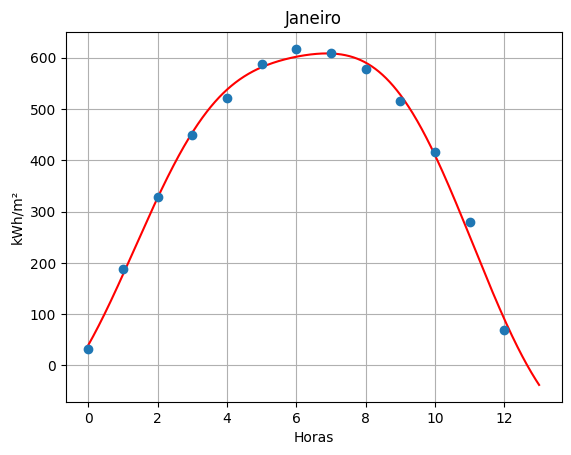

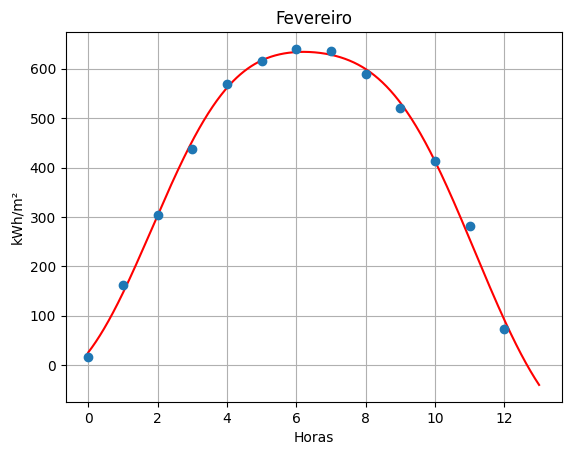

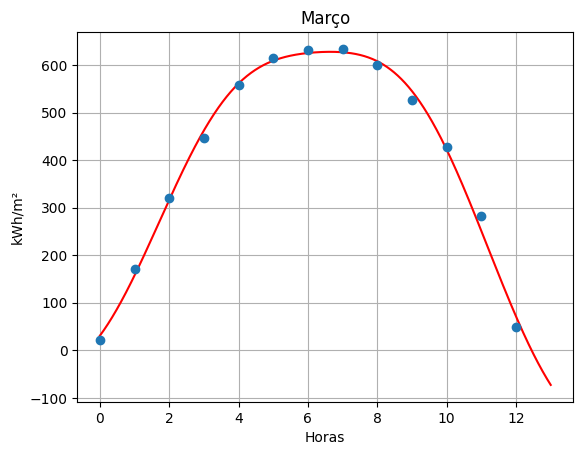

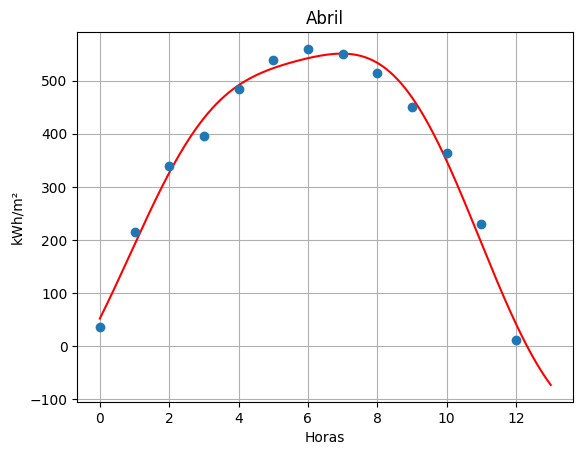

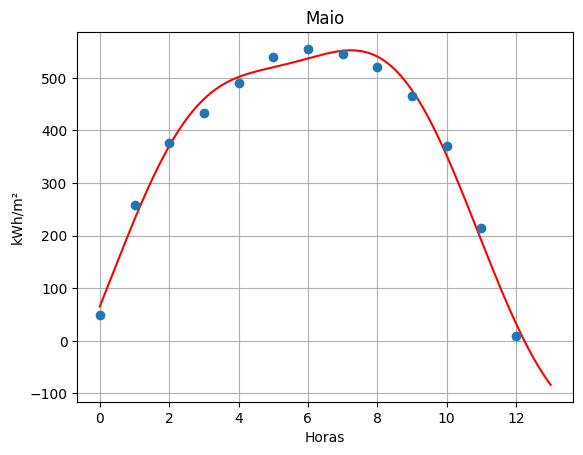

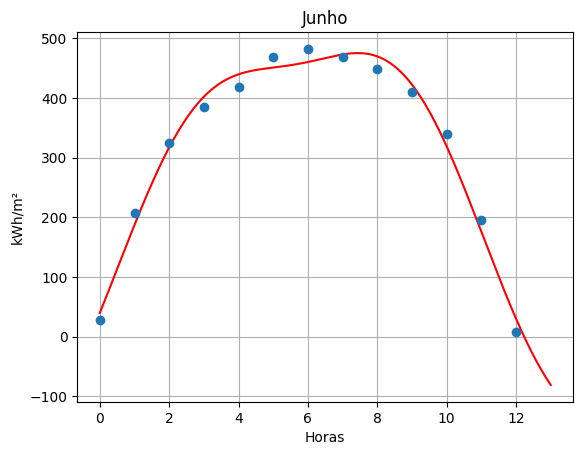

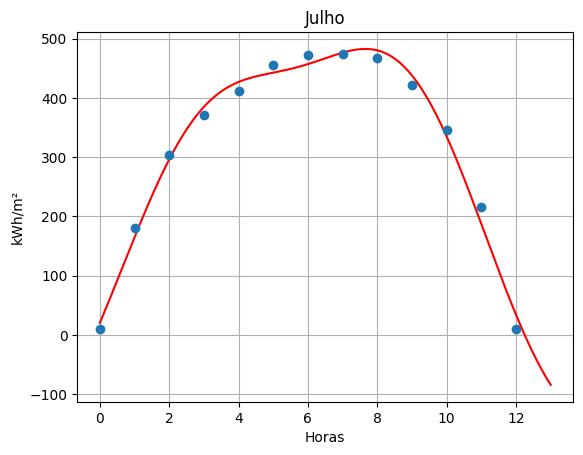

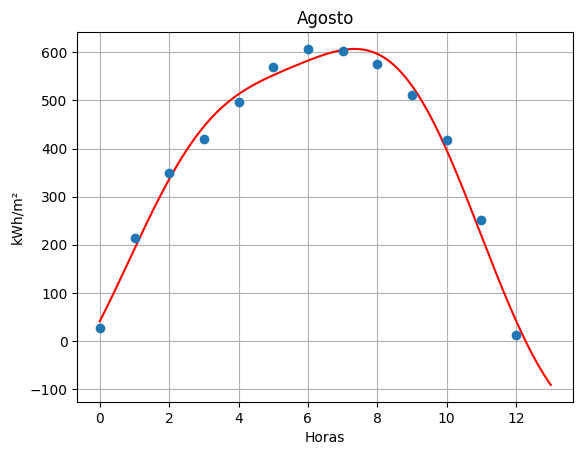

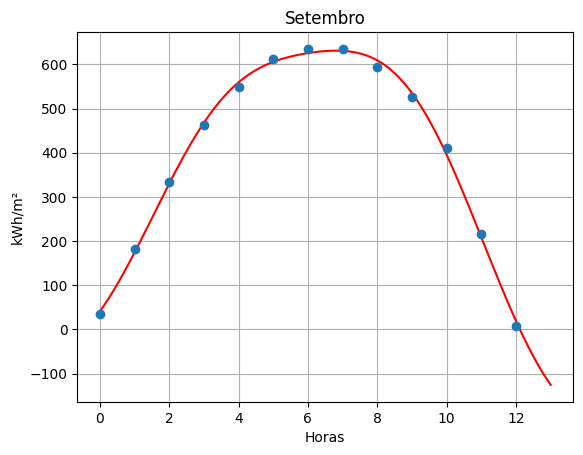

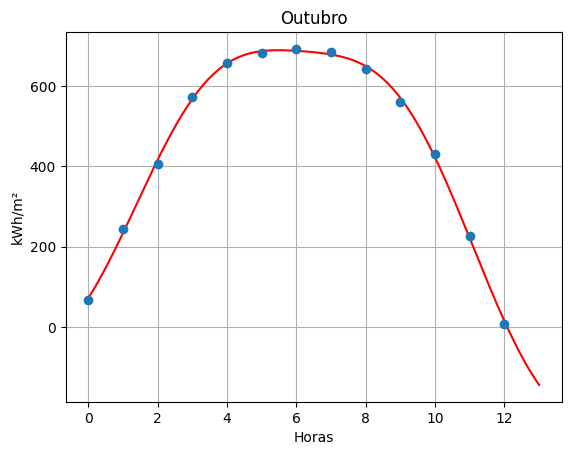

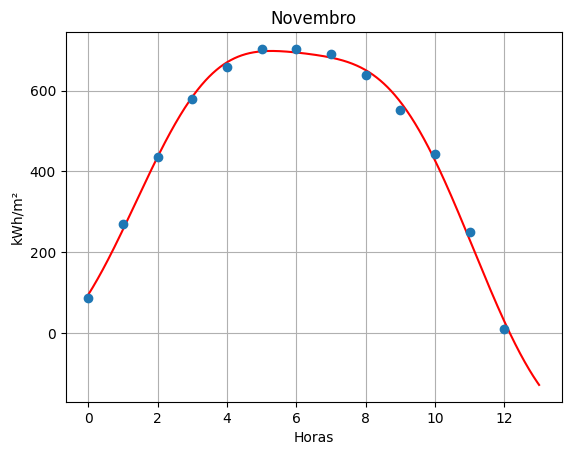

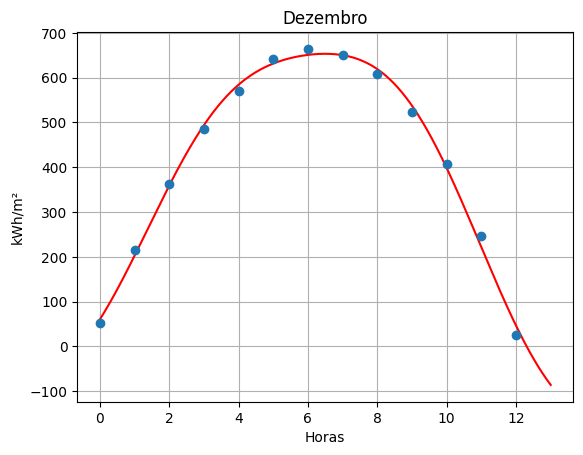

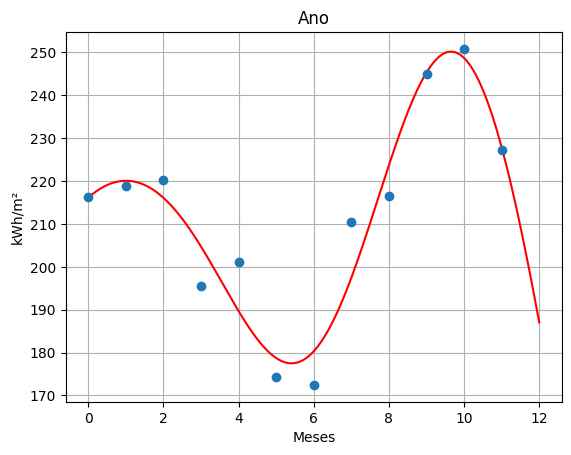

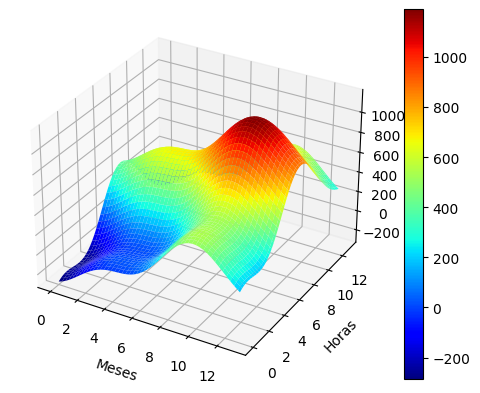

In [14]:
B=teste(2,13)
for i in range(12):
  Aproximacao_Solar_Atlas(Meses[i],i)
Aproximacao_Solar_Atlas(Ano/24,12)
Aproximacao_Solar_Atlas_3D(B,12)
